In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import sys
import absl.logging

In [3]:
absl.logging.set_verbosity(absl.logging.ERROR)
def ConvNet(n=5000, L1_range=[0.0001], epochs=20):   
    plt.rc('font', size=18)
    plt.rcParams['figure.constrained_layout.use'] = True

    for L1 in L1_range:
        # Model / data parameters
        num_classes = 10
        input_shape = (32, 32, 3)

        # the data, split between train and test sets
        (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
        x_train = x_train[1:n]; y_train=y_train[1:n]
        #x_test=x_test[1:500]; y_test=y_test[1:500]

        # Scale images to the [0, 1] range
        x_train = x_train.astype("float32") / 255
        x_test = x_test.astype("float32") / 255
        print("orig x_train shape:", x_train.shape)

        # convert class vectors to binary class matrices
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        use_saved_model = False
        if use_saved_model:
            model = keras.models.load_model("cifar.model")
        else:
            model = keras.Sequential()
            model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
            model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
            model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
            model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
            model.add(Dropout(0.5))
            model.add(Flatten())
            model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(L1)))
#             model = keras.Sequential()
#             model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
#             model.add(Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'))
#             model.add(MaxPooling2D((2, 2)))
#             model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
#             model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'))
#             model.add(MaxPooling2D((2, 2)))
#             model.add(Dropout(0.5))
#             model.add(Flatten())
#             model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(L1)))
            
            model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
            model.summary()

            batch_size = 128
            history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
            model.save("cifar.model")
            plt.subplot(211)
            plt.plot(history.history['accuracy'])
            plt.plot(history.history['val_accuracy'])
            plt.title('model accuracy (n = %d)'%n)
            #plt.title('model accuracy (L1=%.4f)'%L1)
            plt.ylabel('accuracy')
            plt.xlabel('epoch')
            plt.legend(['train', 'val'], loc='upper left')
            plt.subplot(212)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model loss (n = %d)'%n)
            #plt.title('model loss (L1=%.4f)'%L1)
            plt.ylabel('loss'); plt.xlabel('epoch')
            plt.legend(['train', 'val'], loc='upper left')
            plt.show()

    preds = model.predict(x_train)
    y_pred = np.argmax(preds, axis=1)
    y_train1 = np.argmax(y_train, axis=1)
    print(classification_report(y_train1, y_pred))
    print(confusion_matrix(y_train1,y_pred))

    preds = model.predict(x_test)
    y_pred = np.argmax(preds, axis=1)
    y_test1 = np.argmax(y_test, axis=1)
    print(classification_report(y_test1, y_pred))
    print(confusion_matrix(y_test1,y_pred))

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)    

INFO:tensorflow:Assets written to: cifar.model\assets


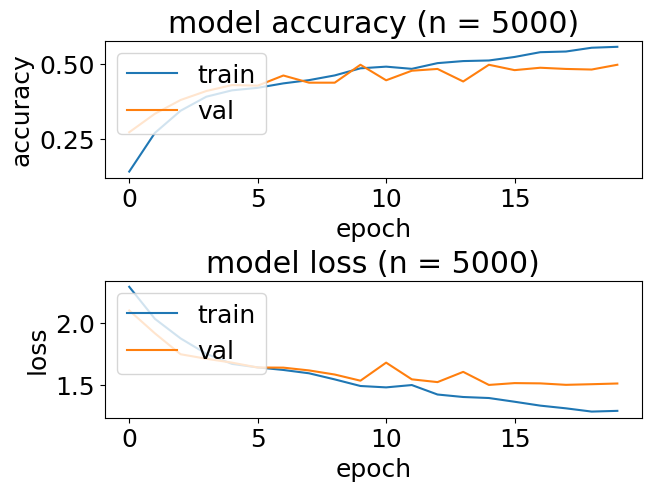

157/157 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.71      0.52      0.60       505
           1       0.60      0.83      0.70       460
           2       0.51      0.52      0.52       519
           3       0.58      0.45      0.51       486
           4       0.57      0.43      0.49       519
           5       0.53      0.64      0.58       488
           6       0.65      0.69      0.67       518
           7       0.65      0.66      0.65       486
           8       0.72      0.65      0.68       520
           9       0.62      0.74      0.68       498

    accuracy                           0.61      4999
   macro avg       0.61      0.61      0.61      4999
weighted avg       0.62      0.61      0.61      4999

[[264  57  36   6  12   3   1  15  76  35]
 [  5 384   1   1   3   2   6   2  10  46]
 [ 17  14 271  20  50  46  40  33  13  15]
 [  3  15  28 218  24  98  49  19   4  28]
 [ 15   9  85 

In [4]:
ConvNet()

orig x_train shape: (9999, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)    

INFO:tensorflow:Assets written to: cifar.model\assets


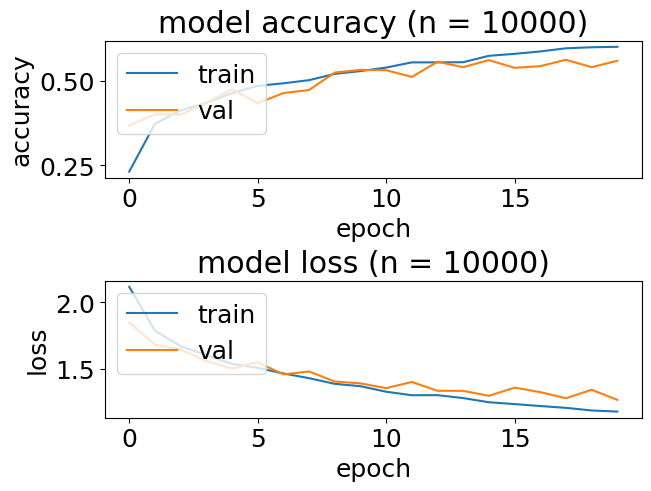

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1005
           1       0.67      0.88      0.76       974
           2       0.68      0.43      0.53      1032
           3       0.51      0.58      0.54      1016
           4       0.59      0.55      0.57       999
           5       0.69      0.45      0.54       937
           6       0.58      0.81      0.67      1029
           7       0.69      0.71      0.70      1001
           8       0.77      0.74      0.75      1025
           9       0.74      0.69      0.72       981

    accuracy                           0.65      9999
   macro avg       0.66      0.65      0.65      9999
weighted avg       0.66      0.65      0.65      9999

[[673  59  30  26  21   3   8  27 123  35]
 [ 17 855   3   5   4   3  18   5  17  47]
 [ 72  26 444  92 129  52 116  57  30  14]
 [ 13  26  33 594  59  62 152  43  11  23]
 [ 28  12  55 

In [4]:
ConvNet(n=10000)

orig x_train shape: (19999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense

INFO:tensorflow:Assets written to: cifar.model\assets


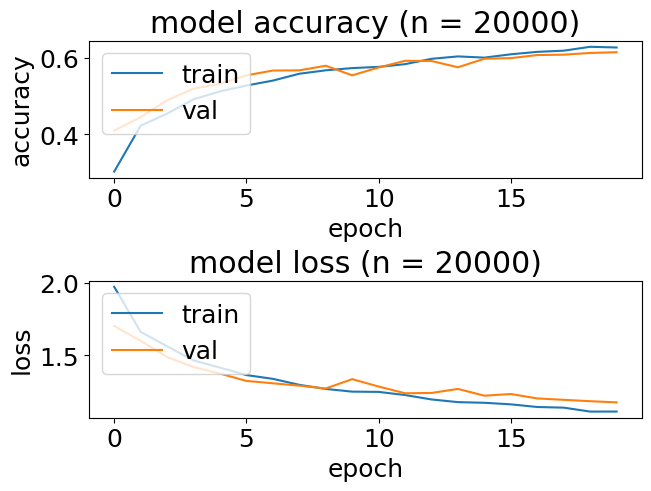

625/625 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1989
           1       0.79      0.83      0.81      1981
           2       0.66      0.44      0.53      2042
           3       0.47      0.65      0.55      2011
           4       0.57      0.65      0.61      2009
           5       0.68      0.53      0.60      1925
           6       0.83      0.69      0.75      2037
           7       0.70      0.77      0.73      2027
           8       0.82      0.75      0.79      2012
           9       0.75      0.79      0.77      1966

    accuracy                           0.68     19999
   macro avg       0.69      0.68      0.68     19999
weighted avg       0.69      0.68      0.68     19999

[[1458   56   47   67   36   11    5   43  166  100]
 [  46 1647    7   19    6   11   10   20   35  180]
 [ 183   29  897  253  314   94   92  111   38   31]
 [  38   15   71 1302  147 

In [5]:
ConvNet(n=20000)

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense

INFO:tensorflow:Assets written to: cifar.model\assets


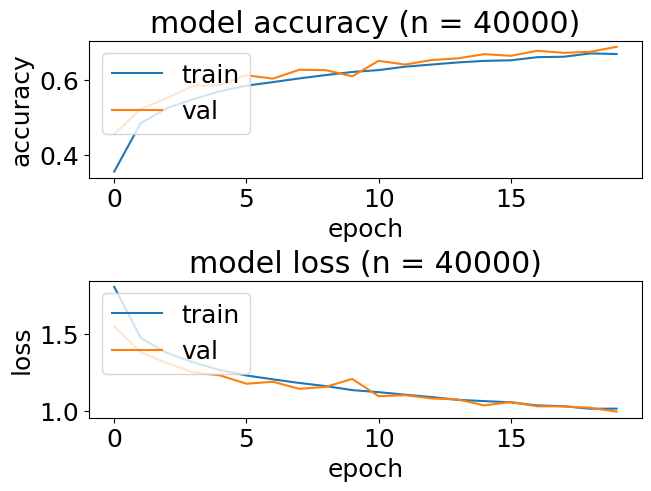

1250/1250 [==============================] - 5s 4ms/step
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3986
           1       0.82      0.90      0.86      3986
           2       0.66      0.58      0.62      4048
           3       0.54      0.60      0.57      3984
           4       0.69      0.64      0.67      4003
           5       0.60      0.66      0.63      3975
           6       0.81      0.76      0.78      4019
           7       0.78      0.78      0.78      4023
           8       0.80      0.86      0.83      3997
           9       0.86      0.78      0.82      3978

    accuracy                           0.73     39999
   macro avg       0.73      0.73      0.73     39999
weighted avg       0.73      0.73      0.73     39999

[[2983   94  160   77   53   39   20   55  380  125]
 [  74 3592   17   32    6   18   14   10   79  144]
 [ 290   33 2338  318  359  288  180  118   87   37]
 [  72   22  209 2374  17

In [6]:
ConvNet(n=40000)

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)

INFO:tensorflow:Assets written to: cifar.model\assets


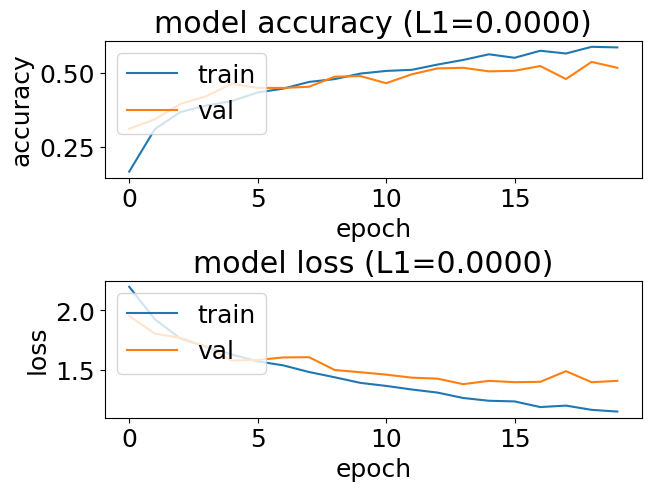

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_9 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)

INFO:tensorflow:Assets written to: cifar.model\assets


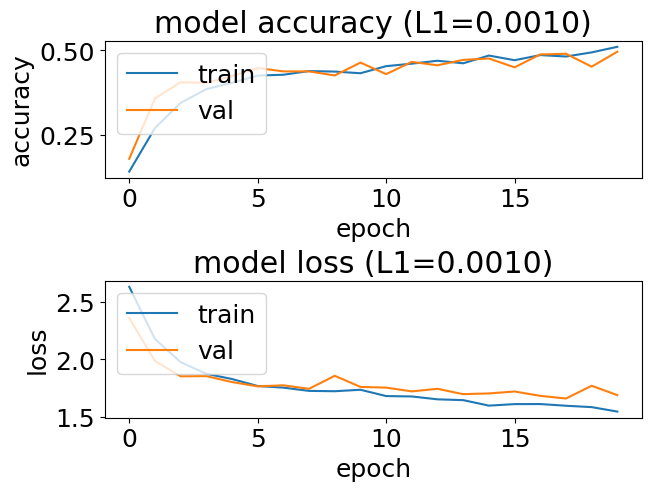

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_43 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_10 (Dens

INFO:tensorflow:Assets written to: cifar.model\assets


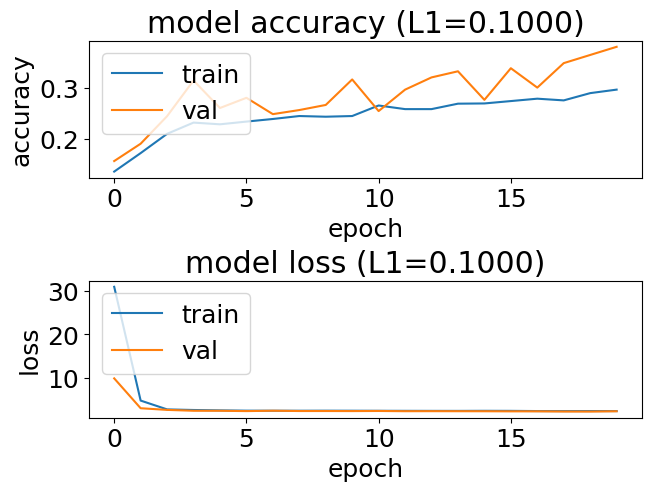

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_11 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_11 (Dens

INFO:tensorflow:Assets written to: cifar.model\assets


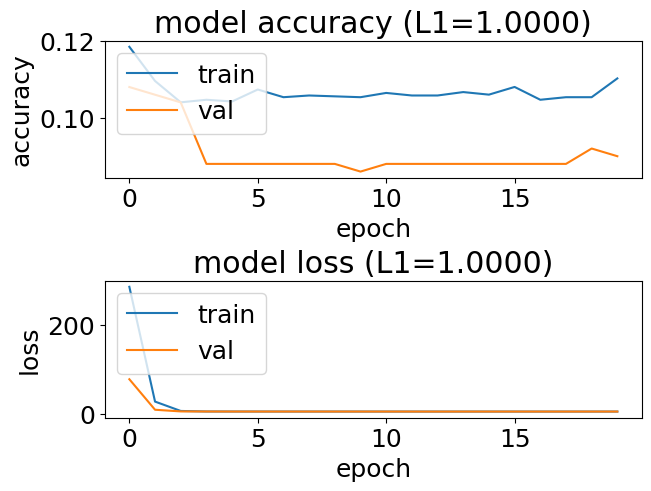

157/157 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       505
           1       0.00      0.00      0.00       460
           2       0.06      0.02      0.03       519
           3       0.00      0.00      0.00       486
           4       0.11      0.97      0.19       519
           5       0.00      0.00      0.00       488
           6       0.04      0.01      0.02       518
           7       0.00      0.00      0.00       486
           8       0.00      0.00      0.00       520
           9       0.00      0.00      0.00       498

    accuracy                           0.10      4999
   macro avg       0.02      0.10      0.02      4999
weighted avg       0.02      0.10      0.03      4999

[[  0   0  11   0 433   0  61   0   0   0]
 [  0   0  17   0 431   0  12   0   0   0]
 [  0   0   9   0 479   0  31   0   0   0]
 [  0   0  29   0 433   0  24   0   0   0]
 [  0   0   7 

F:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.06      0.02      0.03      1000
           3       0.00      0.00      0.00      1000
           4       0.10      0.96      0.19      1000
           5       0.00      0.00      0.00      1000
           6       0.04      0.01      0.02      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.02     10000
weighted avg       0.02      0.10      0.02     10000

[[  0   0  12   0 848   0 140   0   0   0]
 [  0   0  52   0 926   0  22   0   0   0]
 [  0   0  23   0 915   0  62   0   0   0]
 [  0   0  62   0 883   0  55   0   0   0]
 [  0   0  28 

F:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
ConvNet(n=5000, L1_range=[0, 0.001, 0.1, 1])

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_49 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_51 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_12 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_12 (Den

INFO:tensorflow:Assets written to: cifar.model\assets


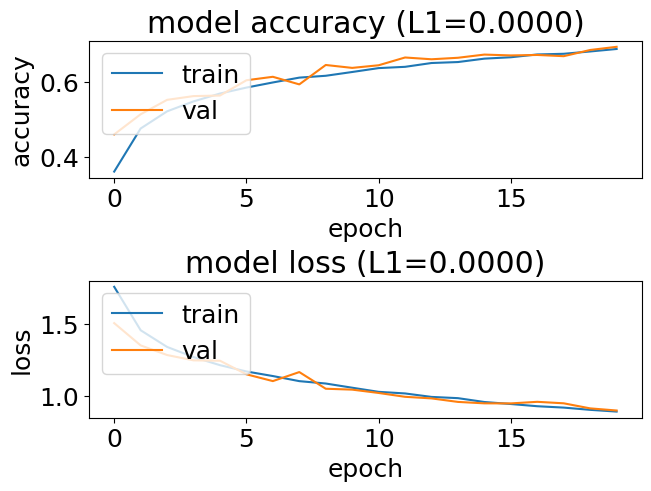

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_53 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_54 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_55 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_13 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_13 (Flatten)        (None, 2048)              0         
                                                                 
 dense_13 (Den

INFO:tensorflow:Assets written to: cifar.model\assets


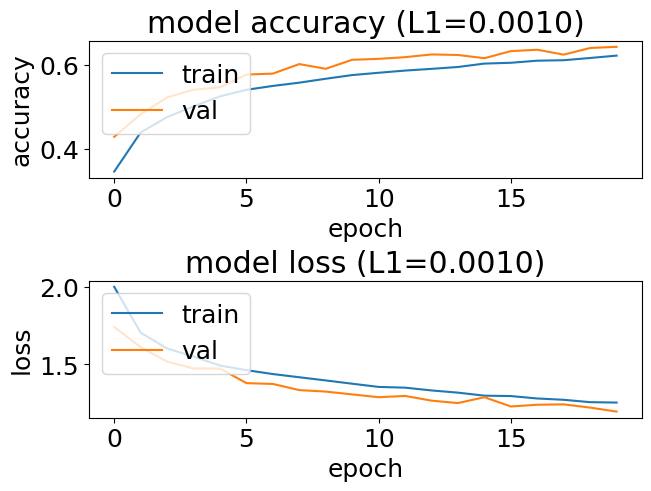

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_58 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_59 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_14 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_14 (Flatten)        (None, 2048)              0         
                                                                 
 dense_14 (Den

INFO:tensorflow:Assets written to: cifar.model\assets


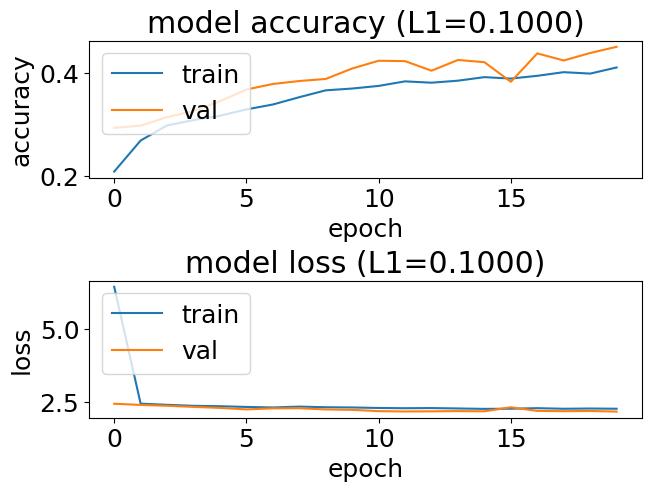

orig x_train shape: (39999, 32, 32, 3)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 conv2d_63 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 dropout_15 (Dropout)        (None, 8, 8, 32)          0         
                                                                 
 flatten_15 (Flatten)        (None, 2048)              0         
                                                                 
 dense_15 (Den

INFO:tensorflow:Assets written to: cifar.model\assets


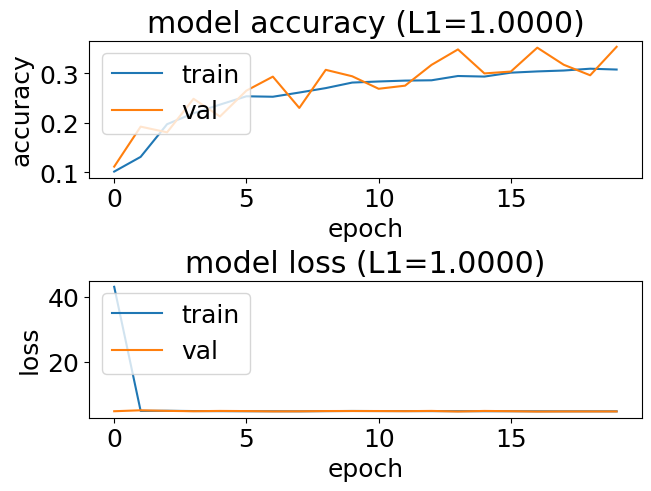

1250/1250 [==============================] - 5s 4ms/step
              precision    recall  f1-score   support

           0       0.36      0.58      0.44      3986
           1       0.47      0.47      0.47      3986
           2       0.35      0.05      0.09      4048
           3       0.25      0.13      0.17      3984
           4       0.30      0.40      0.34      4003
           5       0.22      0.53      0.31      3975
           6       0.47      0.41      0.44      4019
           7       0.49      0.08      0.14      4023
           8       0.50      0.39      0.44      3997
           9       0.36      0.44      0.40      3978

    accuracy                           0.35     39999
   macro avg       0.38      0.35      0.32     39999
weighted avg       0.38      0.35      0.32     39999

[[2304  267   76   12  146  234   24   12  624  287]
 [ 526 1883    2   22   46  151   23   12  208 1113]
 [ 483   97  210  234 1170 1041  393   69  197  154]
 [ 206   92   48  501  28

In [10]:
ConvNet(n=40000, L1_range=[0, 0.001, 0.1, 1])

orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_71 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_72 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_73 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 32)         0         
 2D)           

INFO:tensorflow:Assets written to: cifar.model\assets


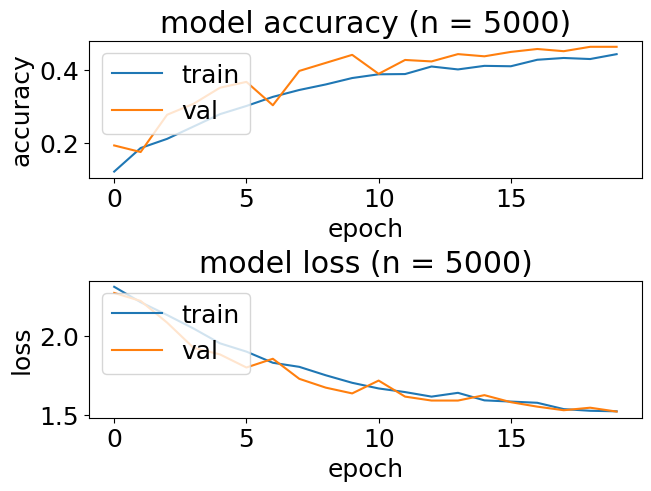

157/157 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       505
           1       0.62      0.59      0.60       460
           2       0.39      0.29      0.33       519
           3       0.39      0.35      0.37       486
           4       0.42      0.45      0.43       519
           5       0.45      0.57      0.50       488
           6       0.61      0.51      0.56       518
           7       0.58      0.52      0.55       486
           8       0.53      0.72      0.61       520
           9       0.66      0.53      0.59       498

    accuracy                           0.51      4999
   macro avg       0.51      0.51      0.51      4999
weighted avg       0.51      0.51      0.51      4999

[[281  22  24   7  12   6   1  13 131   8]
 [ 28 272   1   4   3   7   7   8  64  66]
 [ 52   5 151  42 127  43  36  33  24   6]
 [ 16   9  45 170  27 137  37  24  12   9]
 [ 46   4  61 

In [16]:
ConvNet(n=5000)